<a href="https://colab.research.google.com/github/KunalAyush1/PyTorch_learning/blob/main/PyTorch1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import torch
import numpy as np
from torch import nn

# Computer Vision Library in PyTorch

```torchvision```  - base domain library for PyTorch CV
```torchvision.datasets``` - get datasets and dat loading functions for CV


```torchvision.models``` - get pre-trained models for CV


```torchvision.transforms``` - functions for manipulating our vision data


```torch.utils.data.Dataset``` - base dataset class for PyTorch


```torch.utils.DataLoader``` - creates a python iterable over a dataset


In [89]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)


2.8.0+cu126
0.23.0+cu126


# We will be working on the FashionMNIST dataset

In [90]:
train_data = datasets.FashionMNIST(root="data",  # where to download data to
                                   train = True, # do we want the training dataset
                                   download = True, # do we want to download
                                   transform=torchvision.transforms.ToTensor(), #how do we want to transform the data
                                   target_transform = None #how do we want to transform the target/labels
                                   )

test_data = datasets.FashionMNIST(root="data",
                                  train = False,
                                  download = True,
                                  transform=ToTensor(),
                                  target_transform = None
                                  )



In [91]:
len(train_data) , len(test_data)

(60000, 10000)

In [92]:
image, label = train_data[0]
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [93]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [94]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [95]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [96]:
image.shape
# [colour channels , height , width]

torch.Size([1, 28, 28])

In [97]:
class_names[label]

'Ankle boot'

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

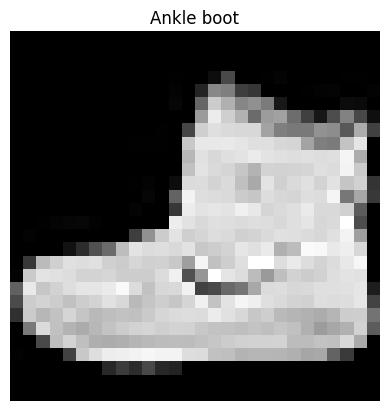

In [98]:
#Visualizing  our data
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False)


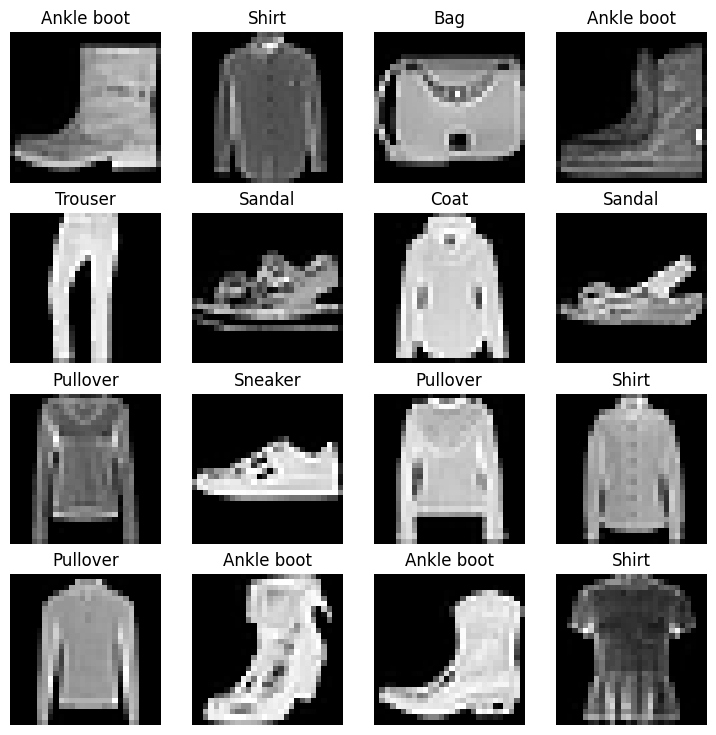

In [99]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows , cols = 4,4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img , label = train_data[random_idx]
    fig.add_subplot(rows , cols , i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)






In [100]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## Preparing Data loader

Our data is in PyTorch Datsets.
So dataloader will turn our dataset into a python iterable.
ie. we want to turn our data into batches.

##Why?
1. Computationally efficient
2. More chances to update gradients per epoch


In [101]:
from torch.utils.data import DataLoader

#Batch size hyperparameter
BATCH_SIZE = 32

# turning data intio iterables

train_dataloader = DataLoader(dataset=train_data,batch_size =BATCH_SIZE,shuffle = True)

test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)
#order doesnt matter while testing thats why we keep shuffle as false in testing

train_dataloader , test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7a45967a1040>,
 <torch.utils.data.dataloader.DataLoader at 0x7a45967a3d10>)

In [102]:
print(f"DataLoaders : {train_dataloader , test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x7a45967a1040>, <torch.utils.data.dataloader.DataLoader object at 0x7a45967a3d10>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [103]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Baseline Model

We can experiment and improve with this model

In [104]:
# Flattening

'''
A Flatten layer converts a multi-dimensional tensor (like a 2D image with height, width, and channels) into a 1D vector.

It doesn’t learn anything — it just reshapes data before passing it to a fully connected (linear) layer.

Why We Need It

Convolutional layers output feature maps with shape like (batch_size, channels, height, width).

But fully connected (Linear) layers expect a flat vector for each example.

So before connecting CNN outputs to a classifier,
you must flatten the 3D (or 4D with batch) tensor into 1D per image.
'''

flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(x.shape)
print(output.shape)
  # 28*28 = 784( 1 value per pixel)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [105]:
from torch import nn
class FashionMNISTV0(nn.Module):
  def __init__(self,
               input_shape : int,
               hidden_units : int,
               output_shape = int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=output_shape),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [106]:
torch.manual_seed(42)

model_0 = FashionMNISTV0(input_shape = 784 , hidden_units=10, output_shape=len(class_names)).to("cpu")
model_0

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [107]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)

# Creating a function to time our experiments

we often want to track :
1. Model's performance( accuracy and loss)
2. How fast it runs


In [108]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time


In [109]:

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [110]:
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

## Training Loop
1. Loop through epochs
2. Loop through training batches
3. Loop through testing batches
4. Print out whats happening
5. Time it all(fun)

In [111]:
from tqdm.auto import tqdm
from timeit import default_timer as timer
import torch

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"\nEpoch: {epoch}\n{'-' * 20}")

    # ------------------- Training -------------------
    model_0.train()
    train_loss = 0.0

    for batch, (X, y) in enumerate(train_dataloader):
        # Forward pass
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print progress
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader)

    # ------------------- Testing -------------------
    model_0.eval()
    test_loss, test_acc = 0.0, 0.0

    with torch.inference_mode():  # no gradient tracking
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test).item()
            test_acc += (test_pred.argmax(dim=1) == y_test).type(torch.float).sum().item()

    # Move division OUTSIDE inference_mode
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader.dataset)

    print(f"Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.4f}")

# ------------------- Time Calculation -------------------
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device)
)


  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
--------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.5904 | Test Loss: 0.5095 | Test Acc: 0.8203

Epoch: 1
--------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.4763 | Test Loss: 0.4799 | Test Acc: 0.8318

Epoch: 2
--------------------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train Loss: 0.4550 | Test Loss: 0.4766 | Test Acc: 0.8341
Train time on cpu: 25.886 seconds


In [112]:
torch.manual_seed(42)
def eval_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              acuracy_fn):
  loss , acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X , y in tqdm(data_loader):
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += acuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}


In [113]:
model_0_results = eval_mode(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             acuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [114]:
# Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [115]:
!nvidia-smi

Sat Oct 25 17:03:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   74C    P0             36W /   70W |     104MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Model 1 with improvement like introducing non-linearity(ReLU)

In [116]:
class FashionMNISTV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features= output_shape),
        nn.ReLU()
    )

  def forward(self , x:torch.Tensor):
    return self.layer_stack(x)

In [117]:
torch.manual_seed(42)
model_1 = FashionMNISTV1( input_shape = 784,
                         hidden_units=10,
                          output_shape = len(class_names)).to(device)

In [118]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [119]:
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### Training and Testing Loops

* creating a function for training loop
* another for testing loop

In [120]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  model.train()
  train_loss , train_acc = 0 , 0

  for batch, (X, y) in enumerate(data_loader):
    X , y = X.to(device) , y.to(device)
    #
        # Forward pass
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    train_acc += accuracy_fn(y,y_pred.argmax(dim=1))

        # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%")


In [128]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device:  torch.device = device):

  test_loss , test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
      for X , y in data_loader:
        X , y = X.to(device) , y.to(device)

        test_pred = model(X)
        test_loss += loss_fn(test_pred, y).item()
        test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

  test_loss /= len(data_loader)
  test_acc /= len(data_loader)
  print(f"Test Loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%")

In [129]:
torch.manual_seed(42)
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"\nEpoch: {epoch}\n{'-' * 20}")

  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer=optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)






  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
--------------------
Train Loss: 0.64301 | Train Accuracy: 76.70%
Test Loss: 0.67230 | Test accuracy: 75.47%

Epoch: 1
--------------------
Train Loss: 0.62820 | Train Accuracy: 76.99%
Test Loss: 0.66428 | Test accuracy: 75.97%

Epoch: 2
--------------------
Train Loss: 0.61610 | Train Accuracy: 77.32%
Test Loss: 0.65158 | Test accuracy: 76.35%
Train time on cuda: 28.644 seconds


In [130]:
model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [142]:
def eval_model(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device = device):
  loss , acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X , y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

In [143]:
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device = device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV1',
 'model_loss': 0.6515759229660034,
 'model_acc': 76.34784345047923}

## CNN( Conv Neural networks )

In [149]:
class FashionMNISTV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, ## trick to calculate
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x



In [150]:
torch.manual_seed(42)
model_2 = FashionMNISTV2(input_shape = 1,
                         hidden_units = 10,
                         output_shape = len(class_names)).to(device)

In [151]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [152]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_gpu_model_2 = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"\nEpoch: {epoch}\n{'-' * 20}")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)
train_end_time_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_gpu_model_2,
                                            end = train_end_time_model_2,
                                            device = device)



  0%|          | 0/3 [00:00<?, ?it/s]


Epoch: 0
--------------------
Train Loss: 0.59423 | Train Accuracy: 78.48%
Test Loss: 0.39267 | Test accuracy: 85.68%

Epoch: 1
--------------------
Train Loss: 0.35769 | Train Accuracy: 87.09%
Test Loss: 0.34934 | Test accuracy: 86.89%

Epoch: 2
--------------------
Train Loss: 0.32195 | Train Accuracy: 88.47%
Test Loss: 0.31654 | Test accuracy: 88.43%
Train time on cuda: 35.513 seconds


In [153]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device = device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.31653499603271484,
 'model_acc': 88.4285143769968}

In [156]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results["training time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training time
0,FashionMNISTV0,0.476639,83.426518,25.885620
1,FashionMNISTV1,0.651576,76.347843,28.643706
2,FashionMNISTV2,0.316535,88.428514,35.512785


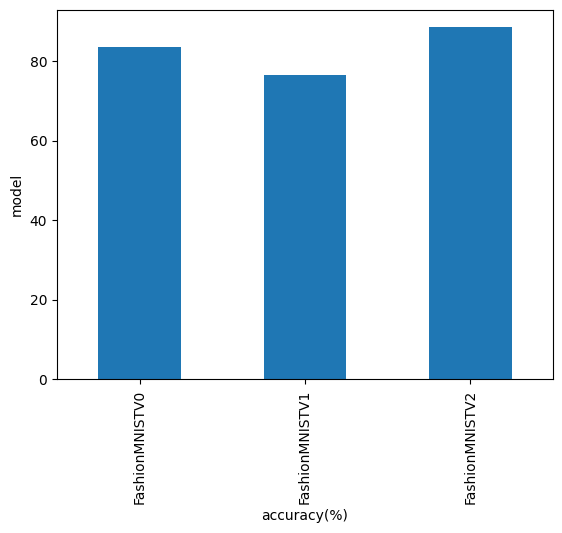

In [158]:
compare_results.set_index("model_name")["model_acc"].plot(kind='bar')
plt.xlabel("accuracy(%)")
plt.ylabel("model");

In [160]:
## Confusion Matrix

!pip install -q torchmetrics -U mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 55.8 MB/s eta 0:00:00


In [162]:
import torchmetrics , mlxtend

In [165]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

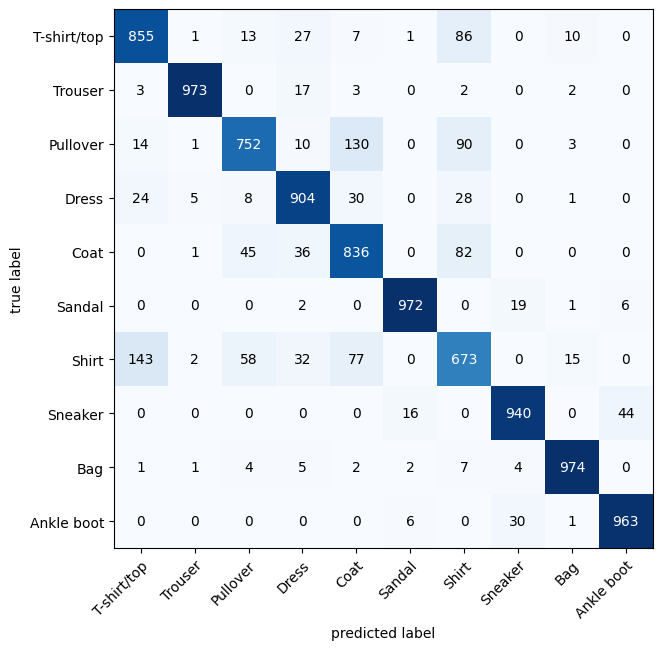

In [166]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [167]:
from pathlib import Path


MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True
)


MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth
